Total points for this HW: 10

Please note: Copying and pasting other people's work is absolutely prohibited. Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4

## Question 1 (25%)

### Consider the dataset HW2_task1.csv, a binary classification problem with two real-valued input attributes.  As you can see from the plot, the dataset is linearly separable. Train a linear SVM (setting C=100000 just to emphasize that no slack variables are allowed) and  answer the following five questions: 

C:\Users\14367\AppData\Local\Temp\ipykernel_16732\1362634970.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))


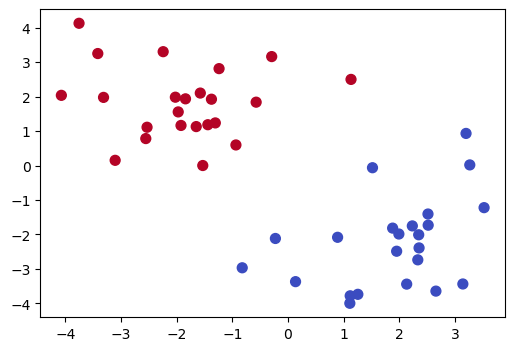

In [2]:
# Data
data1=pd.read_csv('HW2_task1.csv')
X=data1.iloc[:,:2]
Y=data1.iloc[:,2]
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

### a. Report the separating hyperplane (line) (5%).

C:\Users\14367\AppData\Local\Temp\ipykernel_16732\2889039441.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))


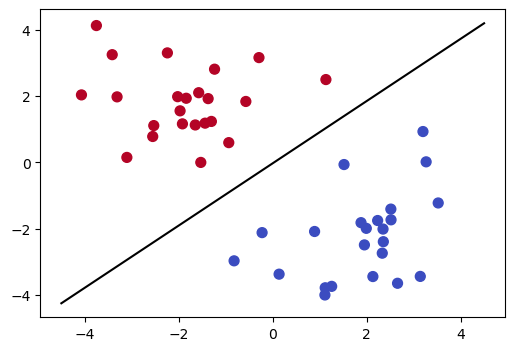

In [3]:
# your code here
from sklearn import svm

clf = svm.SVC(kernel='linear',C=10**10)  
clf.fit(X, Y)

w = clf.coef_[0]
a = -w[0] / w[1]
x1 = np.linspace(-4.5, 4.5)
x2 = a * x1 - (clf.intercept_[0]) / w[1]

plt.plot(x1, x2, 'k-')
plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.show()

In [4]:
print('the slope of the line is',a,'and the intercept of the line is',-clf.intercept_[0]/w[1],'\n'
      'The formula of the separating hyperplane is {}*x1+{}*x2+{}=0'.format(w[0],w[1],clf.intercept_[0]))

the slope of the line is 0.9386576482271843 and the intercept of the line is -0.025837774172388386 
The formula of the separating hyperplane is -0.641528161899245*x1+0.683452761622814*x2+0.01765889811230546=0


### b. List the support vectors (5%).

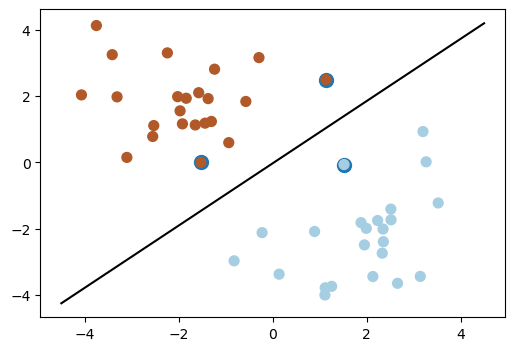

In [5]:
# your code here
plt.gca()
plt.plot(x1, x2, 'k-')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100)
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.Paired)
plt.axis('tight')
plt.show()

In [6]:
clf.support_vectors_

array([[ 1.5180363e+00, -6.3993825e-02],
       [ 1.1323244e+00,  2.5000131e+00],
       [-1.5313310e+00,  1.2000000e-05]])

### c. Calculate and report the upper and lower hyperplanes (lines) of the margin (5%).

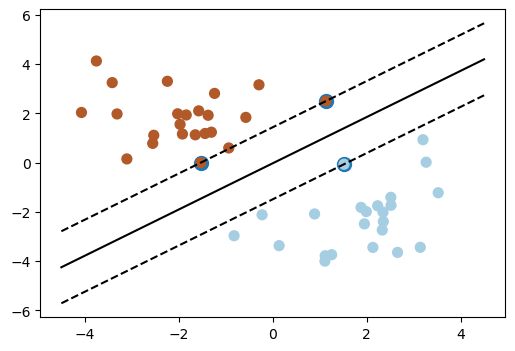

In [7]:
# your code here
bd = clf.support_vectors_[0]
x2_down = a * x1 + (bd[1] - a * bd[0])

bu = clf.support_vectors_[-1]
x2_up = a * x1 + (bu[1] - a * bu[0])

plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100)
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.Paired)
plt.axis('tight')
plt.show()

In [8]:
print(f"Upper hyperplane: {w[0]}*x1 + {w[1]}*x2_up - {bu[1]*w[1]+bu[0]*w[0]} = 0")
print(f"Lower hyperplane: {w[0]}*x1 + {w[1]}*x2_down + {-bd[1]*w[1]-bd[0]*w[0]} = 0")

Upper hyperplane: -0.641528161899245*x1 + 0.683452761622814*x2_up - 0.9824001631224722 = 0
Lower hyperplane: -0.641528161899245*x1 + 0.683452761622814*x2_down + 1.0175997917338035 = 0


### d. Compute and report the width of the margin (5%). 

#### Optional: you can also add a plot showing all points, the separating hyperplane that passes through the support vectors for 5% extra credit.

In [9]:
# your code here
margin_width = 2 / np.sqrt(sum(w ** 2))
print(f"Width of the margin: {margin_width}")

Width of the margin: 2.133624894940584


C:\Users\14367\AppData\Local\Temp\ipykernel_16732\4016275744.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))


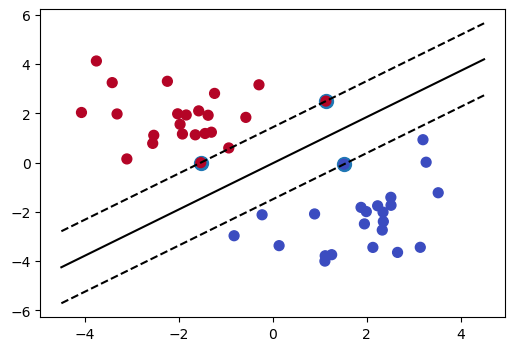

In [10]:
# optional plot here
bd = clf.support_vectors_[0]
x2_down = a * x1 + (bd[1] - a * bd[0])

bu = clf.support_vectors_[-1]
x2_up = a * x1 + (bu[1] - a * bu[0])

plt.gca()
plt.plot(x1, x2, 'k-')
plt.plot(x1, x2_down, 'k--')
plt.plot(x1, x2_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=100)
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2))
plt.axis('tight')
plt.show()

### e. What would you expect to happen to the margin if the constant C was made very small? (5%)

Your answer here.  You can justify your intuitions with code if you'd like, but this is not required.

Answer:
  - If the constant C were made very small, the SVM would increase the width of the margin and make it wider.
  - The model would have more misclassified training points. This can result in a decision boundary that doesn't fit the training data well, but it might generalize better to other data.

## Question 2 (25%)

### Given the dataset provided below, answer the following questions:

C:\Users\14367\AppData\Local\Temp\ipykernel_16732\1785234660.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));


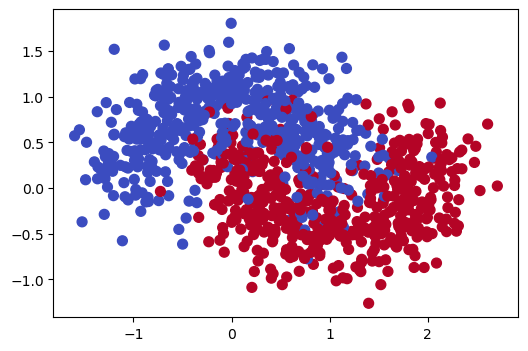

In [11]:
# Data 
data2=pd.read_csv('HW2_task2.csv')
X=data2.iloc[:,:2]
Y=data2.iloc[:,2]

plt.gca()
plt.scatter(X.iloc[:,0], X.iloc[:,1], s=50, c=Y, cmap=plt.cm.get_cmap('coolwarm', 2));
plt.show()

# Generate training (X_train, Y_train) and testing (X_test, Y_test) datasets for out of sample test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

### a. Train a polynomial SVM using the training set. Use the default arguments, and report both in-sample (training set) and out-of-sample (test set) classification accuracy (4%).

In [12]:
# your code here
poly_svc = svm.SVC(kernel='poly')
poly_svc.fit(X_train, Y_train)

print(f"In-sample classification accuracy: {(Y_train==poly_svc.predict(X_train)).sum()*100/len(Y_train)}%")
print(f"Out-of-sample classification accuracy: {(Y_test==poly_svc.predict(X_test)).sum()*100/len(Y_test)}%")

In-sample classification accuracy: 84.92537313432835%
Out-of-sample classification accuracy: 85.15151515151516%


### Next we will use the validation subset (part of the training set) in order to pick the optimal parameters for the polynomial model.

### b. Try polynomials of degree 1,2,3,4. For each degree, consider a variety of regularization constants from the range C=[math.exp(i) for i in np.linspace(-10,2*degree,200)] in order to evaluate the classifier performance over the validation set defined below.  Plot the graph of "Accuracy vs log(C)" for each degree. (8%)


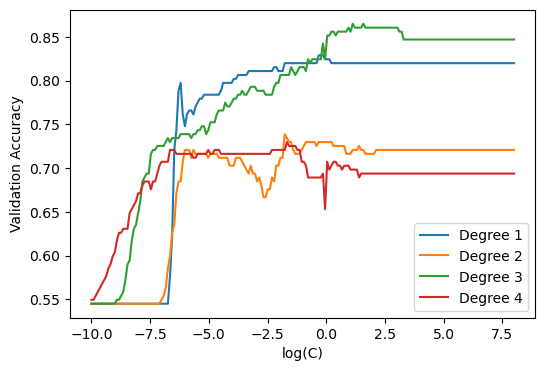

In [13]:
# Next we generate validation data (X_vali, Y_vali) from the training dataset. 
# Denote the remaining training data by (X_train_1, Y_train_1).
X_train_1,X_vali,Y_train_1,Y_vali = train_test_split(X_train, Y_train, test_size=0.33, random_state=99)

# your code here
from sklearn.metrics import accuracy_score

C_values = [np.exp(i) for i in np.linspace(-10, 8, 200)]
accuracies = {d: [] for d in [1, 2, 3, 4]}

for d in [1, 2, 3, 4]:
    for C in C_values:
        poly_svc = svm.SVC(kernel='poly', degree=d, C=C)
        poly_svc.fit(X_train_1, Y_train_1)
        Y_vali_pred = poly_svc.predict(X_vali)
        vali_accuracy = accuracy_score(Y_vali, Y_vali_pred)
        accuracies[d].append(vali_accuracy)

for d, vals in accuracies.items():
    plt.plot(np.log(C_values), vals, label=f'Degree {d}')

plt.xlabel('log(C)')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

### c. Explain how each of these selected parameters can impact the performance of the model. Provide insights into the consequences of choosing different values for these parameters, particularly in terms of overfitting, accuracy, generalization, and other (5%).

Your answer here. You can justify your intuitions with examples if you want.

Answer:
  - Higher degrees can capture more patterns but increase the risk of overfitting. 
  - The regularization constant C balance the relationship between smooth decision boundary and accuracy. 
  - Smaller C can get more misclassifications but better generalization.

### d. Choose the optimal degree and the optimal regularization constant C based on these graphs.  Use the optimal degree and C to compute and report the final out-of-sample accuracy of the best classification model selected (8%). 

In [14]:
# your code here
best_degree, best_C, best_accuracy = None, None, 0

for degree in [1, 2, 3, 4]:
    max_accuracy = max(accuracies[degree])
    if max_accuracy > best_accuracy:
        best_accuracy = max_accuracy
        best_degree = degree
        best_C = C_values[accuracies[degree].index(max_accuracy)]

final_poly_svc = svm.SVC(kernel='poly', degree=best_degree, C=best_C)
final_poly_svc.fit(X_train, Y_train)

Y_test_pred_final = final_poly_svc.predict(X_test)
final_out_of_sample_accuracy = accuracy_score(Y_test, Y_test_pred_final)

print(f"Optimal Degree: {best_degree}")
print(f"Optimal C: {best_C}")
print(f"Final out-of-sample accuracy: {final_out_of_sample_accuracy}")

Optimal Degree: 3
Optimal C: 3.082152266290074
Final out-of-sample accuracy: 0.8666666666666667


## Question 3 (10%)

### This task is to be done with manual calculations rather than using Python.

Assume you have a data set as below. It contains records of cars with three features: the type of the car (sports or SUV), the color of the car (red or yellow), and the origin of the car (domestic or imported). And the labels for the data are yes (car was stolen) and no (car was not stolen).

CarType,Color,Origin,Stolen?

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,yes

sports,red,domestic,no

SUV,red,domestic,no

SUV,red,imported,yes

SUV,yellow,imported,no

SUV,yellow,imported,yes

SUV,yellow,domestic,no

sports,yellow,imported,no

sports,red,imported,yes

### Questions (just add responses below, and show how you got this result):

#### a. Calculate and repor the following sample probabilities (5%):

P(Yes)= 6/11

P(No)= 5/11

P(Red|Yes)= 5/6

P(SUV|Yes)= 1/3

P(Domestic|Yes)= 1/2

P(Red|No)= 2/5

P(SUV|No)= 3/5

P(Domestic|No)= 3/5

#### b. Using naive Bayes classification, what is the probability that a red, domestic SUV will be stolen? Show your work (5%).

Your answer here.

$P = P(Red|Yes) \times P(SUV|Yes) \times P(Domestic|Yes) = \frac{5}{6} \times \frac{1}{3} \times \frac{1}{2} = \frac{5}{36}$

## Question 4 (15%)

Consider the following problem involving Gaussian Naive Bayes classification.  We use eight factors to predict if people have diabetes or not. The variables are:

y: The label (0 - no diabetes, 1 - diabetes)

t_pre: Number of times pregnant

glu: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

blood_p: Diastolic blood pressure (mm Hg)

triceps: Triceps skin fold thickness (mm)

serum: 2-Hour serum insulin (mu U/ml)

b_m: Body mass index (weight in kg/(height in m)^2)

pedigree_f: Diabetes pedigree function

age: Age (years)

### Using the data provided below, learn a Naive Bayes classifier from the training data and answer the following questions: 

In [15]:
# Training data
data_train=pd.read_csv("HW2_task4_train.csv") 
y_train=data_train.iloc[:,1] 
X_train=data_train.iloc[:,2:] 

# Testing data
data_test=pd.read_csv("HW2_task4_test.csv")
y_test=data_test.iloc[:,1]
X_test=data_test.iloc[:,2:]

print(X_train.head())

   t_pre  glu  blood_p  triceps  serum   b_m  pedigree_f  age
0      3  158       64       13    387  31.2       0.295   24
1      0   84       64       22     66  35.8       0.545   21
2      9  120       72       22     56  20.8       0.733   48
3      4  110       76       20    100  28.4       0.118   27
4      2  100       66       20     90  32.9       0.867   28


### a. What is the prediction accuracy for Naive Bayes, both in-sample (on the training data) and out-of-sample (on the test data)? (3%)

In [16]:
# your code here
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_train_pred = gnb.predict(X_train)
y_test_pred = gnb.predict(X_test)

in_sample_accuracy = accuracy_score(y_train, y_train_pred)
out_of_sample_accuracy = accuracy_score(y_test, y_test_pred)

print('In-sample Accuracy:{}'.format(in_sample_accuracy))
print('Out-of-sample Accuracy:{}'.format(out_of_sample_accuracy))

In-sample Accuracy:0.7415254237288136
Out-of-sample Accuracy:0.7025316455696202


### b. What is the prior probability of diabetes, learned from the training data? (3%)

In [17]:
# your code here
prior_probability = y_train.mean()
print('Prior probability of diabetes:',prior_probability)

Prior probability of diabetes: 0.326271186440678


### c. What is the mean and variance of each input variable for patients with diabetes? (3%)

In [18]:
# your code here
mean_variance_diabetes = X_train[y_train == 1].agg(['mean', 'var'])

print(mean_variance_diabetes)

          t_pre         glu     blood_p     triceps         serum        b_m  \
mean   4.000000  142.064935   74.389610   33.168831    200.220779  34.890909   
var   12.763158  977.429938  181.267259  109.168489  16018.542720  40.052153   

      pedigree_f         age  
mean    0.614195   35.441558  
var     0.187671  110.934040  


### d. What is the mean and variance of each input variable for patients without diabetes? (3%)

In [19]:
# your code here
mean_variance_no_diabetes = X_train[y_train == 0].agg(['mean', 'var'])

print(mean_variance_no_diabetes)

         t_pre         glu     blood_p     triceps        serum        b_m  \
mean  2.672956  111.238994   69.088050   27.113208   128.257862  31.737736   
var   6.436669  601.664039  139.371945  103.126343  8542.065998  40.395149   

      pedigree_f        age  
mean    0.474289  28.283019  
var     0.086169  69.318128  


### e. What are some potential steps you may want to use to improve the prediction accuracy? (3%)

Your answer here. You can justify your answer with code if you'd like, but this is not required.

Answer:
  - Select relevant features and remove irrelevant features.
  - Apply feature transformations, such as feature scaling or normalization.
  - Implement cross-validation to get a better estimate of the model's performance on different subsets of the data.
  - Using ensemble methods like Bagging or Boosting to improve predictive performance.
  - Data processing, including data preprocessing (missing values, outliers, etc.), data transformation and data enhancement, etc.

## Question 5 (25%)

We have an artificial data set split, where the training set contains both labeled and unlabeled data. Column 'y' is the label, and columns '0','1','2' are categorical variables.

In [20]:
data_train=pd.read_csv("HW2_task5_train.csv")
y_Labeled_train=data_train.iloc[:,1] 
X_Labeled_train=data_train.iloc[:,2:] 

data_test=pd.read_csv("HW2_task5_test.csv")
y_Labeled_test=data_test.iloc[:,1]
X_Labeled_test=data_test.iloc[:,2:]

data_Unlabeled=pd.read_csv("HW2_task5_unlabeled.csv")
X_Unlabeled_train=data_Unlabeled.iloc[:,1:]

print(X_Labeled_train)
print(y_Labeled_train)

   0  1  2
0  4  6  6
1  2  6  2
2  2  6  2
3  6  2  6
4  1  2  2
5  3  4  4
6  6  1  6
7  1  3  6
8  5  1  1
0    0
1    1
2    0
3    1
4    1
5    0
6    0
7    0
8    1
Name: y, dtype: int64


### a. Learn a discrete Naive Bayes classifier from  X_Labeled_train, use it to predict the labels of X_Labeled_test, and report the classification accuracy (10%).

In [21]:
# your code here
def trainNaiveBayesDiscrete(X,y):
    prior = 1.*y.sum()/y.count()
    nbc = {'prior':prior}
    X_1 = X[y==1]
    X_0 = X[y==0]
    for j in X.columns:
        nbc[j+'_1'] = X_1[j].value_counts(normalize=True)
        nbc[j+'_0'] = X_0[j].value_counts(normalize=True)
    return nbc

def testNaiveBayesDiscrete(X,nbc):
    y_pred = pd.Series(index=X.index,dtype='float64')
    for i in X.index:
        # compute odds of y=1
        y_pred[i] = nbc['prior']/(1-nbc['prior']) # prior odds
        for j in X.columns:
            thevalue = X.loc[i,j]
            if thevalue not in nbc[j+'_1']:
                y_pred[i] = y_pred[i]*1E-3
            if thevalue not in nbc[j+'_0']:
                y_pred[i] = y_pred[i]*1E3
            if (thevalue in nbc[j+'_1']) & (thevalue in nbc[j+'_0']):
                y_pred[i] = y_pred[i]*(nbc[j+'_1'][thevalue]+1E-3)/(nbc[j+'_0'][thevalue]+1E-3)
        # convert odds to probability of y=1
        y_pred[i] = y_pred[i]/(1.0+y_pred[i])
    return y_pred

In [22]:
naive_bayes_classifier = trainNaiveBayesDiscrete(X_Labeled_train,y_Labeled_train)
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

Out of sample prediction accuracy: 0.6388888888888888


### b. Improve the classification by using the unlabeled data, data_Unlabeled and the EM algorithm to predict labels of X_Labeled_test, and report the new accuracy by EM semi-supervised algorithm (Please feel free to use code from our lab sessions or any packages you prefer) (15%). 

In [23]:
def initializeNaiveBayesRandom(X_Unlabeled):
    nbc = {'prior':0.5}
    for j in X_Unlabeled.columns:
        thevalues = X_Unlabeled[j].unique()
        nbc[j+'_1'] = {}
        nbc[j+'_0'] = {}
        for jj in thevalues:
            nbc[j+'_1'][jj] = np.random.rand()
            nbc[j+'_0'][jj] = np.random.rand()
    return nbc
    
def EM(X_Labeled,y_Labeled,X_Unlabeled,num_iters):

    # initialize
    
    t = 0
    
    if len(y_Labeled) > 0:
        nbc = trainNaiveBayesDiscrete(X_Labeled,y_Labeled)
    else:
        nbc = initializeNaiveBayesRandom(X_Unlabeled)
    
    while True:
        t = t + 1
        print('Iteration',t,'of',num_iters)
        
        # E step - classify with nbc for unlabeled data only
        y_pred_Unlabeled = testNaiveBayesDiscrete(X_Unlabeled,nbc)
        
        # M step
        X_for_M_step = pd.concat([X_Labeled,X_Unlabeled],ignore_index=True) 
        y_for_M_step = pd.concat([y_Labeled,y_pred_Unlabeled],ignore_index=True)
        prior = 1.*y_for_M_step.sum()/y_for_M_step.count()
        nbc = {'prior':prior}
        for j in X_for_M_step.columns:
            nbc[j+'_1'] = {}
            nbc[j+'_0'] = {}
            for theindex in X_for_M_step.index:
                current_X = X_for_M_step.loc[theindex,j]
                current_y = y_for_M_step.loc[theindex]
                if current_X in nbc[j+'_1']:
                    nbc[j+'_1'][current_X] += current_y
                else:
                    nbc[j+'_1'][current_X] = current_y
                if current_X in nbc[j+'_0']:
                    nbc[j+'_0'][current_X] += (1.0-current_y)
                else:
                    nbc[j+'_0'][current_X] = 1.0-current_y
            # normalize probabilities
            tempsum = 0.0
            for k in nbc[j+'_1']:
                tempsum += nbc[j+'_1'][k]
            for k in nbc[j+'_1']:
                nbc[j+'_1'][k] /= tempsum
            tempsum = 0.0
            for k in nbc[j+'_0']:
                tempsum += nbc[j+'_0'][k]
            for k in nbc[j+'_0']:
                nbc[j+'_0'][k] /= tempsum            
                       
        if t==num_iters:
            break
            
    return nbc

In [24]:
naive_bayes_classifier=EM(X_Labeled_train,y_Labeled_train,X_Unlabeled_train,num_iters=105)
y_pred_test = testNaiveBayesDiscrete(X_Labeled_test,naive_bayes_classifier)

print('Out of sample prediction accuracy:',1.0*sum((y_pred_test>0.5)==y_Labeled_test)/len(y_Labeled_test))

Iteration 1 of 105
Iteration 2 of 105
Iteration 3 of 105
Iteration 4 of 105
Iteration 5 of 105
Iteration 6 of 105
Iteration 7 of 105
Iteration 8 of 105
Iteration 9 of 105
Iteration 10 of 105
Iteration 11 of 105
Iteration 12 of 105
Iteration 13 of 105
Iteration 14 of 105
Iteration 15 of 105
Iteration 16 of 105
Iteration 17 of 105
Iteration 18 of 105
Iteration 19 of 105
Iteration 20 of 105
Iteration 21 of 105
Iteration 22 of 105
Iteration 23 of 105
Iteration 24 of 105
Iteration 25 of 105
Iteration 26 of 105
Iteration 27 of 105
Iteration 28 of 105
Iteration 29 of 105
Iteration 30 of 105
Iteration 31 of 105
Iteration 32 of 105
Iteration 33 of 105
Iteration 34 of 105
Iteration 35 of 105
Iteration 36 of 105
Iteration 37 of 105
Iteration 38 of 105
Iteration 39 of 105
Iteration 40 of 105
Iteration 41 of 105
Iteration 42 of 105
Iteration 43 of 105
Iteration 44 of 105
Iteration 45 of 105
Iteration 46 of 105
Iteration 47 of 105
Iteration 48 of 105
Iteration 49 of 105
Iteration 50 of 105
Iteration